In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [28]:

data = pd.read_csv('diabetes.csv')

In [29]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

In [30]:
data.fillna(data.median(), inplace=True)


In [31]:
print("Dataset Overview:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.38671

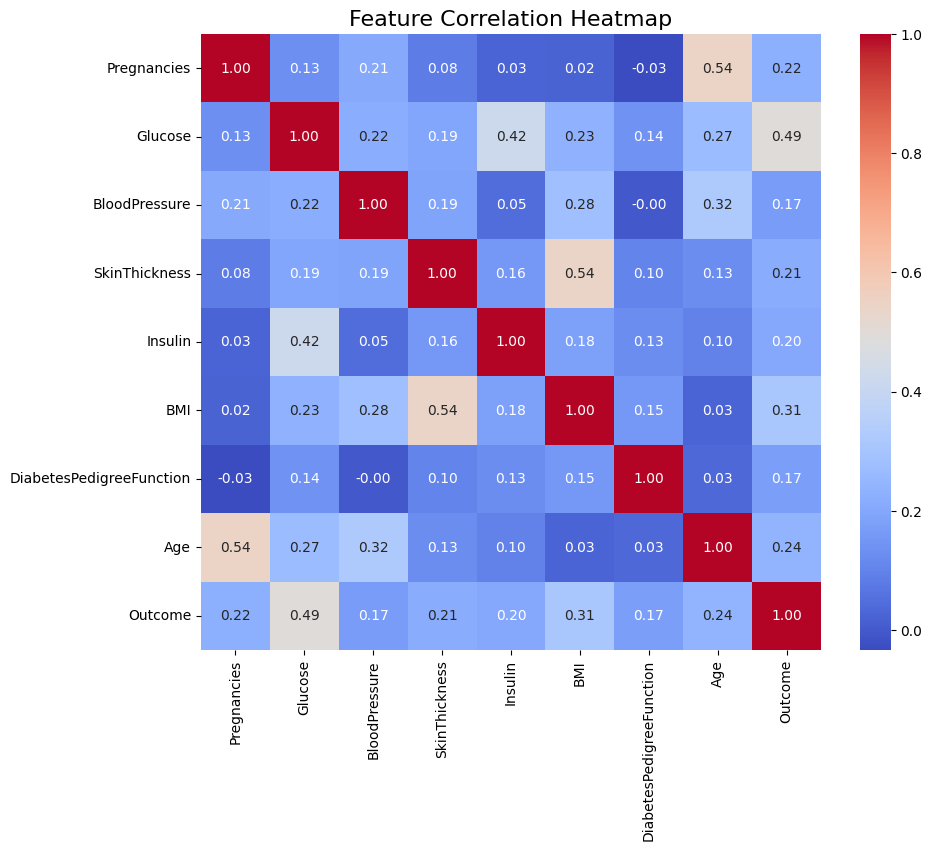

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()


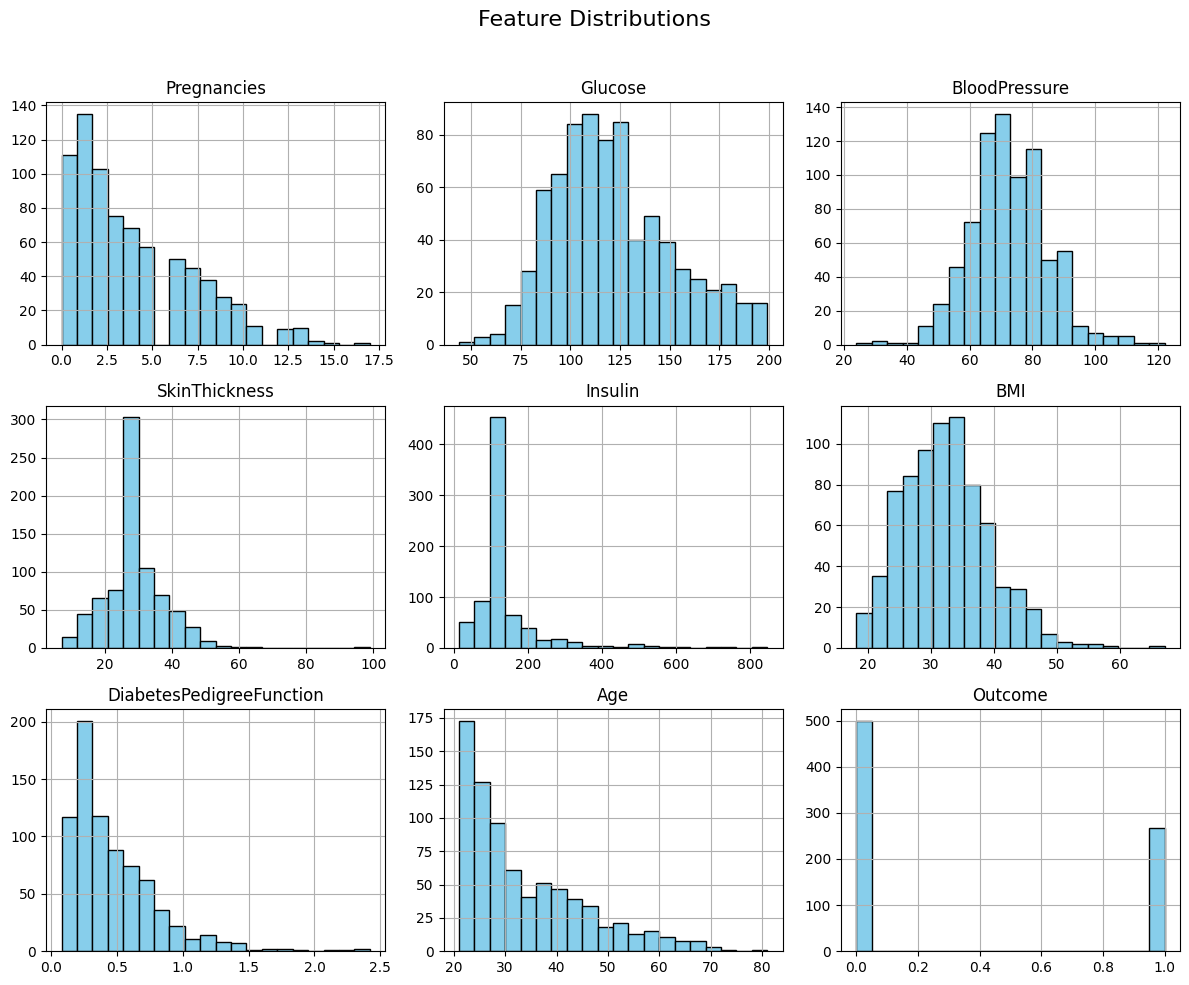

In [33]:
data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

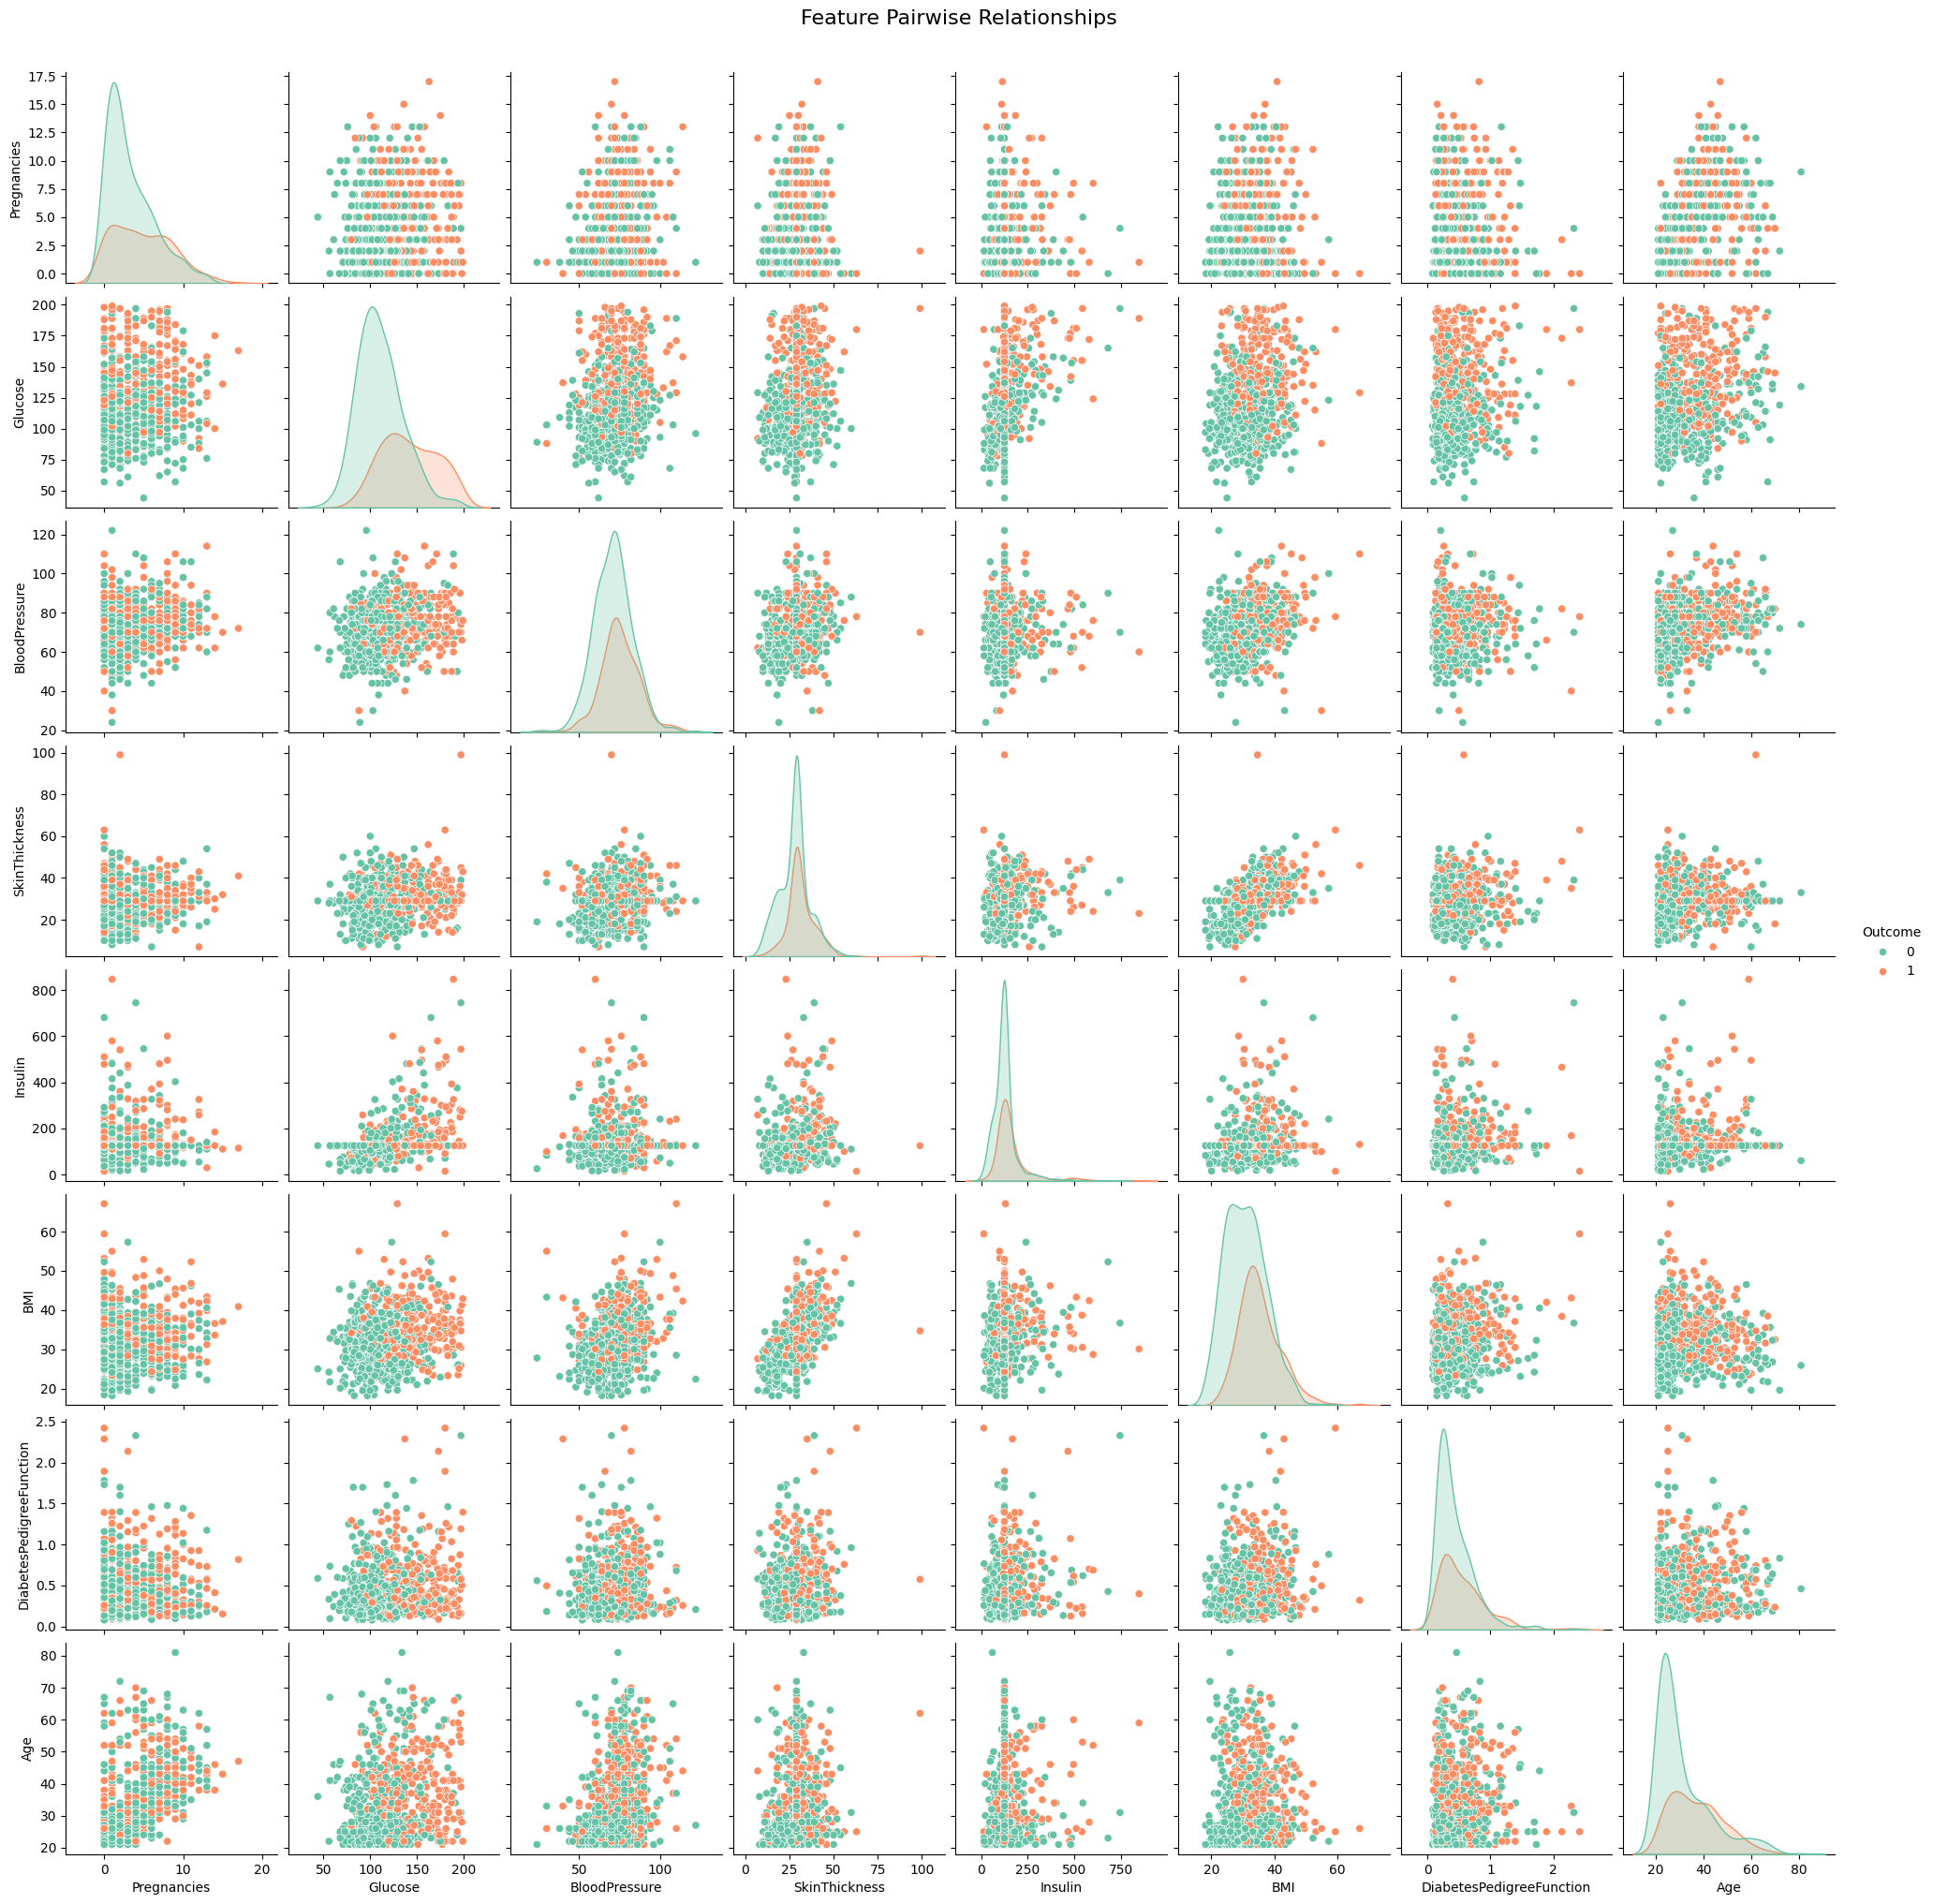

In [34]:
sns.pairplot(data, hue='Outcome', diag_kind='kde', palette='Set2')
plt.suptitle('Feature Pairwise Relationships', y=1.02, fontsize=16)
plt.show()


In [35]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



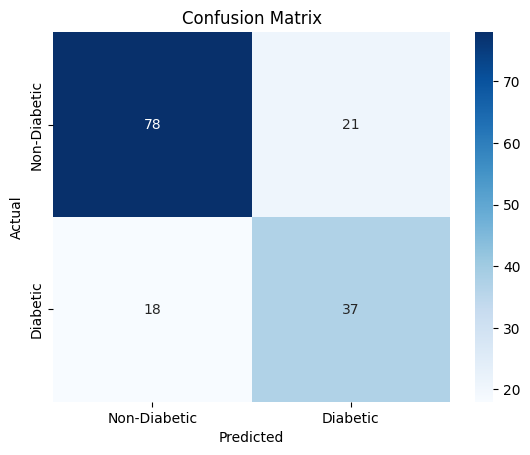

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [39]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

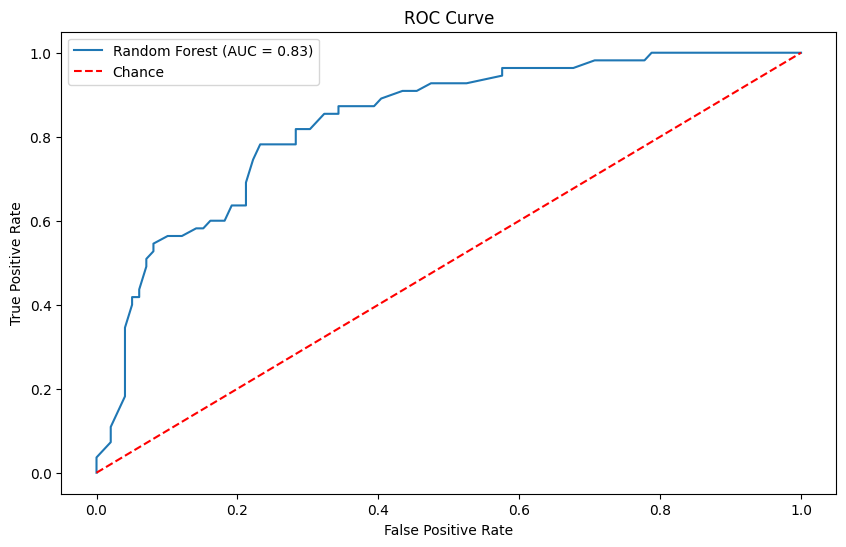

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--', label="Chance")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [41]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

In [42]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [45]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 74.68%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [46]:
if accuracy < 0.85:
    print("The model did not achieve the desired accuracy. Try hyperparameter tuning.")
else:
    print("The model achieved the desired accuracy.")

The model did not achieve the desired accuracy. Try hyperparameter tuning.


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier()

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to search over the parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Model Accuracy: 75.97%


In [65]:
# After the grid search, you have the best model
best_model = grid_search.best_estimator_

# Now, let's ask for user input
print("Enter the following details to predict diabetes:\n")

# Collecting the input from the user
pregnancies = int(input("Enter number of pregnancies: "))
glucose = float(input("Enter plasma glucose concentration (mg/dL): "))
blood_pressure = float(input("Enter diastolic blood pressure (mm Hg): "))
skin_thickness = float(input("Enter triceps skinfold thickness (mm): "))
insulin = float(input("Enter 2-hour serum insulin (mu U/ml): "))
bmi = float(input("Enter body mass index (BMI): "))
diabetes_pedigree_function = float(input("Enter diabetes pedigree function: "))
age = int(input("Enter age (years): "))

# Preparing the input for prediction (making it a 2D array as expected by the model)
user_input = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]])

# Making the prediction using the best model from grid search
prediction = best_model.predict(user_input)

# Displaying the result
if prediction == 1:
    print("The person is likely to have diabetes.")
else:
    print("The person is unlikely to have diabetes.")


Enter the following details to predict diabetes:

Enter number of pregnancies: 3
Enter plasma glucose concentration (mg/dL): 148
Enter diastolic blood pressure (mm Hg): 72
Enter triceps skinfold thickness (mm): 35
Enter 2-hour serum insulin (mu U/ml): 0
Enter body mass index (BMI): 33.6
Enter diabetes pedigree function: 0.627
Enter age (years): 50
The person is likely to have diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
